In [11]:
import numpy as np
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
# import h5py

In [12]:
# hyperparameter
batch_size = 2000
epochs = 100

In [13]:
# 데이터 추출
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
np.shape(x_train)
# 28*28 손글씨 데이터셋 60000장

(60000, 28, 28)

In [14]:
# CNN 안 쓸거니까 그냥 1-D vector로 만들어주자
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 0 ~ 1으로 정규화
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [15]:
# one-hot labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
import tensorflow as tf
# tf.config.list_physical_devices('GPU') --> 나중 버전에선 이 함수를 사용하자!
tf.test.is_gpu_available()

True

In [17]:
# 모델 구축 : Sequential
model = Sequential([
    Dense(256, activation='relu', name='input', input_shape=(784,)),
    Dropout(0.1),    # 0.9의 weights만 사용
    Dense(128, activation='relu', name='hidden1'),
    Dropout(0.1),
    Dense(32, activation='relu', name='hidden2'),
    Dropout(0.1),
    Dense(10, activation='softmax', name='output')
])

model.summary()

# EagerNameValueError..? 같은 거 뜨길래 뭐지 했는데... conda를 전체적으로 update하니 해결되었다.
# tensorflow 2.3에서 발생하는 버그..?같은 거일듯.. (근데 update해도 tenserflow 버전은 동일한데 왜 에러가 안 뜨는 거지.....)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
output (Dense)               (None, 10)               

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test, y_test))

Epoch 1/100
30/30 [==============================] - 1s 39ms/step - loss: 1.0267 - accuracy: 0.6877 - val_loss: 0.4294 - val_accuracy: 0.8835
Epoch 2/100
30/30 [==============================] - 1s 20ms/step - loss: 0.4473 - accuracy: 0.8693 - val_loss: 0.3333 - val_accuracy: 0.9038
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 0.3235 - accuracy: 0.9064 - val_loss: 0.2225 - val_accuracy: 0.9332
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 0.2572 - accuracy: 0.9262 - val_loss: 0.1869 - val_accuracy: 0.9458
Epoch 5/100
30/30 [==============================] - 1s 20ms/step - loss: 0.2107 - accuracy: 0.9385 - val_loss: 0.1591 - val_accuracy: 0.9523
Epoch 6/100
30/30 [==============================] - 1s 20ms/step - loss: 0.1809 - accuracy: 0.9470 - val_loss: 0.1361 - val_accuracy: 0.9584
Epoch 7/100
30/30 [==============================] - 1s 20ms/step - loss: 0.1568 - accuracy: 0.9542 - val_loss: 0.1124 - val_accuracy: 0.9668
Epoch 

30/30 [==============================] - 1s 20ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.0875 - val_accuracy: 0.9832
Epoch 59/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0907 - val_accuracy: 0.9831
Epoch 60/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0958 - val_accuracy: 0.9825
Epoch 61/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.1045 - val_accuracy: 0.9818
Epoch 62/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0919 - val_accuracy: 0.9821
Epoch 63/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0909 - val_accuracy: 0.9834
Epoch 64/100
30/30 [==============================] - 1s 22ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0917 - val_accuracy: 0.9829
Epoch 65/100

In [19]:
# 30 epochs만 돌려도 됐을 듯.

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1238 - accuracy: 0.9806
Test loss: 0.12383656203746796
Test accuracy: 0.9805999994277954


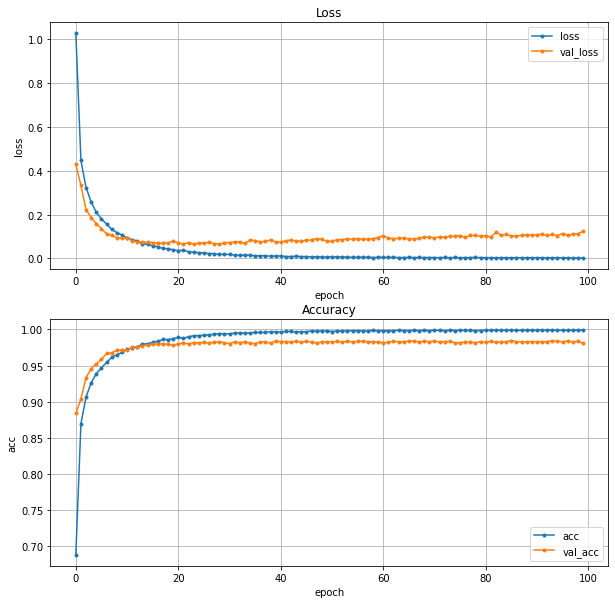

In [24]:
# 학습 과정 그래프로 나타내기
#print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))    # size 지정이 의미가 있나?

# loss subplot
plt.subplot(211)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

# acc subplot
plt.subplot(212)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()